In [32]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR

In [3]:
df = pd.read_csv('stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['avg_score'] = df['total_score']/3

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [7]:
df.drop(['math_score', 'reading_score', 'writing_score'],axis = 1, inplace = True)

In [8]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,218,72.666667
1,female,group C,some college,standard,completed,247,82.333333
2,female,group B,master's degree,standard,none,278,92.666667
3,male,group A,associate's degree,free/reduced,none,148,49.333333
4,male,group C,some college,standard,none,229,76.333333


In [9]:
X = df.drop([ 'avg_score'], axis = 1)

In [10]:
y = df['avg_score']

In [11]:
cat_features = X.select_dtypes(include = object ).columns 

In [12]:
num_features = X.select_dtypes(exclude=object).columns

In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [14]:
from sklearn.compose import ColumnTransformer

In [15]:
preprocessor = ColumnTransformer(
    [
    ('ohe', OneHotEncoder(), cat_features),
    ('scaler', StandardScaler(), num_features)
    ]
)

In [16]:
X = preprocessor.fit_transform(X)

In [17]:
X.shape

(1000, 18)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [22]:
X_train

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.08626782],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.67105512],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  1.18566794],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.        , -0.82600036],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         0.        , -1.22365572],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  1.44297435]])

Create an evaluation function to to get all metrics after model testing


In [20]:
def evaluate_model(true, pred):
    r2 = r2_score(true, pred)
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    return r2, mae, rmse

In [23]:
models = {
    'linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(models)):
    model_name = list(models.keys())[i]
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # training model

    # making predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_r2, model_train_mae, model_train_rmse = evaluate_model(y_train, y_train_pred)
    model_test_r2, model_test_mae, model_test_rmse = evaluate_model(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)

    print('Model performance for training set')
    print('_Root mean sq error: {:.4f}'.format(model_train_rmse))
    print('_Mean absolute error: {:.4f}'.format(model_train_mae))
    print('_R2 Score:{:.4f}'.format(model_train_r2))

    print('---------------------------------------------------------')

    print('Model performance for test set')
    print('_Root mean sq error: {:.4f}'.format(model_test_rmse))
    print('_Mean absolute error: {:.4f}'.format(model_test_mae))
    print('_R2 Score:{:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)

    print('=' * 35)
    print('\n')










linear Regression
Model performance for training set
_Root mean sq error: 0.0000
_Mean absolute error: 0.0000
_R2 Score:1.0000
---------------------------------------------------------
Model performance for test set
_Root mean sq error: 0.0000
_Mean absolute error: 0.0000
_R2 Score:1.0000


Lasso
Model performance for training set
_Root mean sq error: 1.0090
_Mean absolute error: 0.8075
_R2 Score:0.9949
---------------------------------------------------------
Model performance for test set
_Root mean sq error: 1.0557
_Mean absolute error: 0.8312
_R2 Score:0.9948


Ridge
Model performance for training set
_Root mean sq error: 0.0208
_Mean absolute error: 0.0169
_R2 Score:1.0000
---------------------------------------------------------
Model performance for test set
_Root mean sq error: 0.0228
_Mean absolute error: 0.0179
_R2 Score:1.0000


K-Neighbors Regressor
Model performance for training set
_Root mean sq error: 4.0879
_Mean absolute error: 3.1107
_R2 Score:0.9162
-----------------

In [28]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ['Model Name', 'R2 score']).sort_values(by = ['R2 score'], ascending= False)

,Model Name,R2 score
0,linear Regression,1.000000
2,Ridge,0.999998
4,Decision Tree Regressor,0.997924
1,Lasso,0.994801
5,AdaBoost Regressor,0.993705
3,K-Neighbors Regressor,0.879455


The performance of Linear regression is best among all, so we will go with Linear Regression. 


In [30]:
lr_model = LinearRegression(fit_intercept= True)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [31]:
score = r2_score(y_test, y_pred)
print(score)


1.0


<Axes: xlabel='avg_score'>

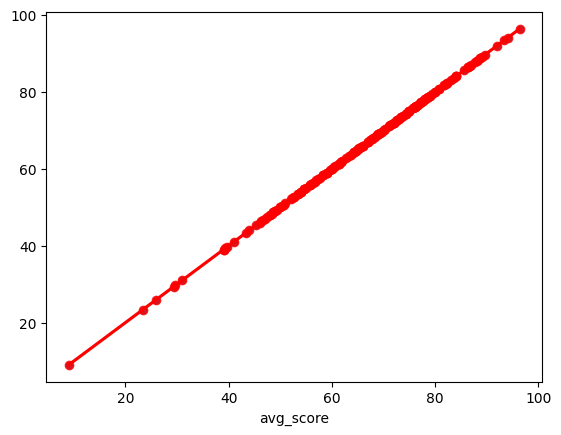

In [39]:
sns.scatterplot(x = y_test, y = y_pred)
sns.regplot(x = y_test, y = y_pred , color = 'red')